In [6]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def geometric_brownian_motion(S0,T,dt,mu,sigma):
    N=int(T/dt)
    t = np.linspace(0, T, N)
    W = np.cumsum(np.random.normal(0, np.sqrt(dt), size=N))  # Wiener process
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    print(S)
    return t, S
    

In [8]:
def fetch_stock_data(ticker, start_date, end_date):
    try: 
        data = yf.download(ticker, start_date, end_date)
        return data[['Open', 'High', 'Low', 'Close', 'Volume']]
    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

In [9]:
if __name__ == "__main__":
    ticker = input("Enter the stock ticker symbol (e.g., AAPL): ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

In [10]:
stock_data = fetch_stock_data(ticker, start_date, end_date)
if stock_data.empty:
        print("No valid data to process. Exiting.")
else:
        close_prices = stock_data['Close']

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


No valid data to process. Exiting.


In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, AAPL)    0 non-null      float64
 1   (High, AAPL)    0 non-null      float64
 2   (Low, AAPL)     0 non-null      float64
 3   (Close, AAPL)   0 non-null      float64
 4   (Volume, AAPL)  0 non-null      float64
dtypes: float64(5)
memory usage: 0.0 bytes


In [12]:
stock_data.describe()

Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [13]:
plt.figure(figsize=(10, 6))
close_prices.plot(title=f"Historical Stock Prices for {ticker}", label="Actual Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid()
plt.legend()
plt.show()


NameError: name 'close_prices' is not defined

<Figure size 1000x600 with 0 Axes>

In [31]:
S0 = float(close_prices.iloc[-1])  # Last known price
T = 1  # Time period in years
dt = 1 / 252  # Daily time step (assuming 252 trading days/year)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22416\81815143.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(close_prices.iloc[-1])  # Last known price


In [32]:
stock_data['Log Returns'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
mu = stock_data['Log Returns'].mean() * 252  # Annualized daily log return
sigma = stock_data['Log Returns'].std() * np.sqrt(252)  # Annualized volatility

print(f"Drift coefficient (mu): {mu:}")
print(f"Volatility (sigma): {sigma:}")

Drift coefficient (mu): 0.34921160189149497
Volatility (sigma): 0.21292588503131893


In [33]:
t, simulated_prices = geometric_brownian_motion(S0, T, dt, mu, sigma)

[252.55273742 249.12873907 249.12762779 246.88013641 244.24646809
 243.70914173 242.47921668 238.88170631 232.81665056 230.48810485
 233.19720627 235.71399393 239.74681767 237.67297782 235.31452595
 235.44155523 234.13103647 234.82670389 235.67534588 231.03757893
 229.69868304 227.45231354 231.74713473 231.14638949 234.08556395
 235.42434321 237.92776549 236.01307411 238.79587894 242.53192919
 238.18591666 237.12948325 240.12250719 244.12884084 246.41204709
 250.95551113 249.24339801 246.97669458 250.88625685 257.36214023
 265.92253983 266.8282604  263.35034368 264.23439431 263.62584437
 254.84373881 254.25049991 259.67149811 257.1314437  257.97716918
 257.23106168 262.02272969 266.29528797 266.45810042 268.1147641
 273.97828148 280.98744455 282.29545983 281.78830395 285.48562966
 285.75360603 282.43395119 284.61333843 287.2517181  280.66174769
 286.2171081  289.27672178 293.77063078 293.83894108 291.50312751
 293.16772853 297.92595291 297.20898938 295.66284554 302.02211894
 298.990342

In [34]:
print(f"Last known price: {S0}")

Last known price: 250.4199981689453


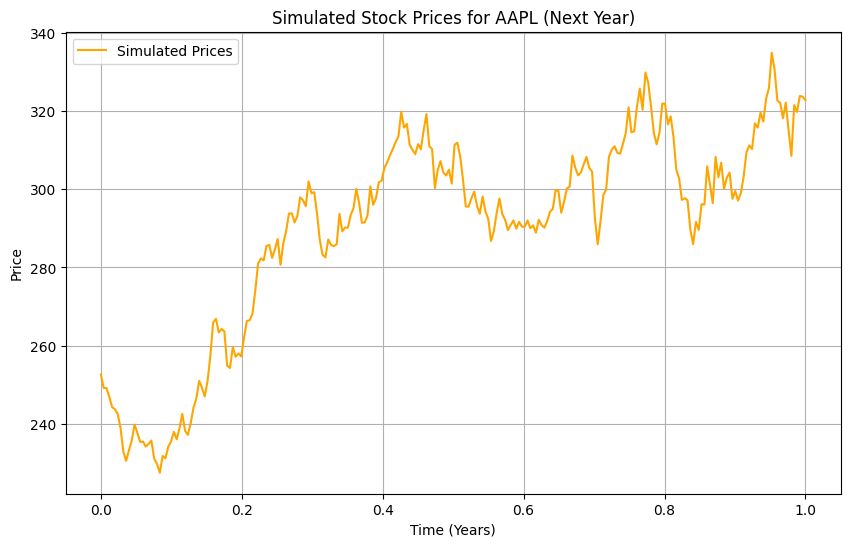

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(t, simulated_prices, label="Simulated Prices", color='orange')
plt.title(f"Simulated Stock Prices for {ticker} (Next Year)")
plt.xlabel("Time (Years)")
plt.ylabel("Price")
plt.grid()
plt.legend()
plt.show()